In [111]:
# import SVC
from pycaret.classification import *


from sklearn.metrics import accuracy_score

# import train_test_split
from sklearn.model_selection import train_test_split,cross_val_predict
# import random forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [73]:
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [115]:
df = pd.read_csv('../csv/credit_score_clean_extraction.csv')
x = df.drop(['Credit_Score'],axis=1)
column = x.columns
y = custom_encoding(df["Credit_Score"])
print(y.head())


0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64


In [107]:
def out_liar(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lowerBand = Q1 - 1.5 * IQR
    upperBand = Q3 + 1.5 * IQR
    # number of outlier in column
    print(column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count())
    print(lowerBand,upperBand)
    # convert any outlier value to upper or lower bound
    column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
    return column_data

   


5272
-1503.7625 4015.7975
2221
-4696.531163110194 11956.284455058922
2017
-4870.087083333333 12454.39625


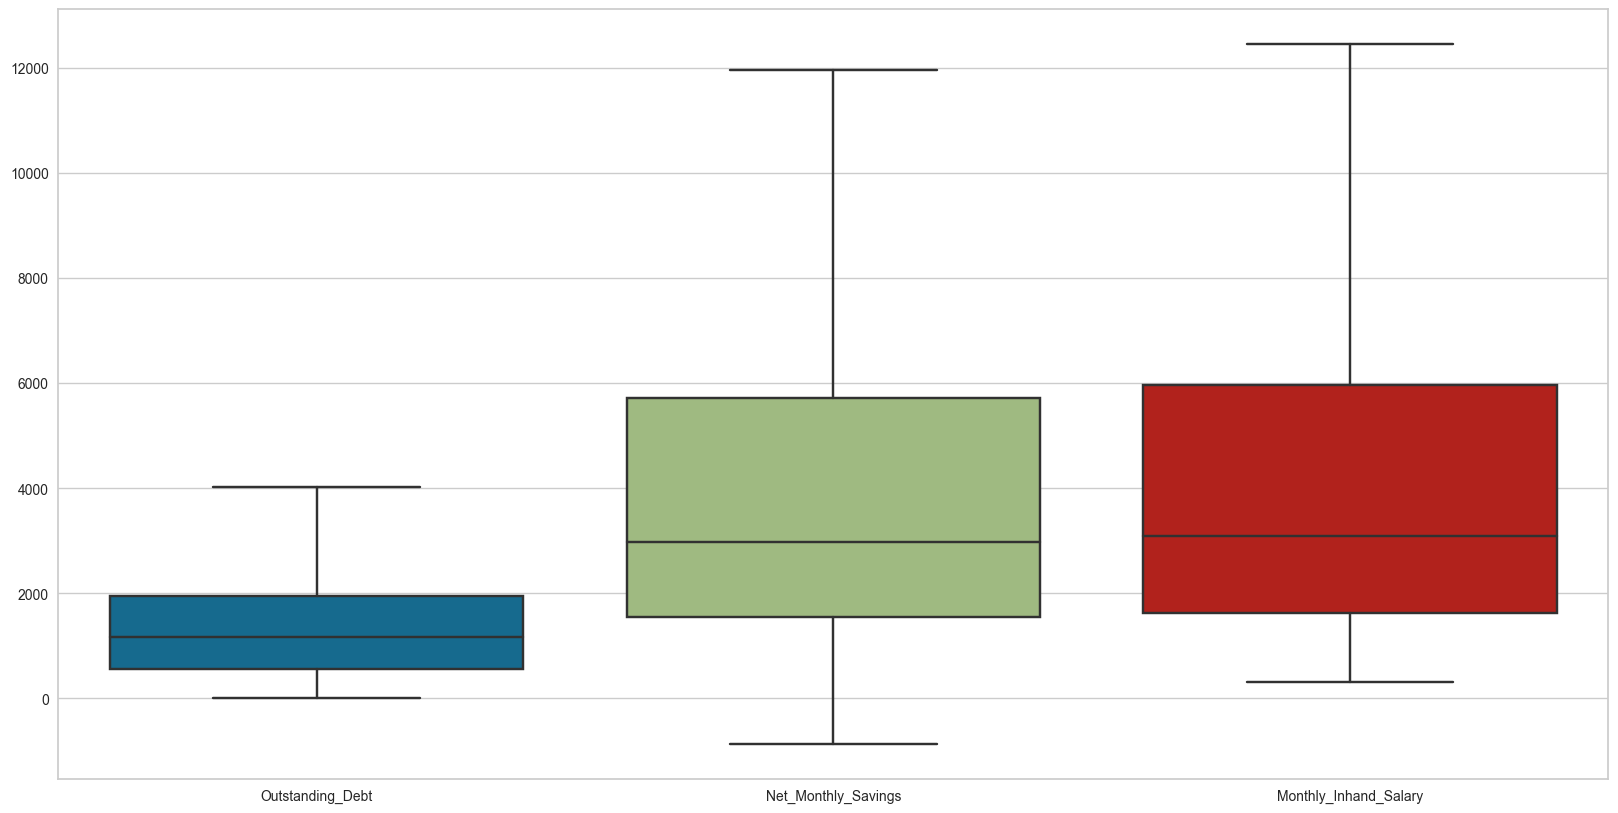

In [117]:
features=[
    "Outstanding_Debt",
    "Net_Monthly_Savings",
    "Monthly_Inhand_Salary",
]   
for feature in features:
    x[feature] = out_liar(x[feature])
    
# box plot
plt.figure(figsize=(20,10))
sns.boxplot(data=x[features])
plt.show()


In [102]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
    "Monthly_Inhand_Salary",
]
for i in features:
    print(x[i].describe())

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64
count    100000.000000
mean        221.220460
std          99.680716
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64
count    100000.000000
mean          1.066160
std           0.732904
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Credit_Mix, dtype: float64
count    100000.00000
mean        211.35634
std         151.74002
min           0.00000
25%          79.00000
50%         187.00000
75%         308.00000
max         506.00000
Name: Type_of_Loan, dtype: float64
count    100000.000000
mean         63.297200
std          68.847028
min           0.000000
25%          12.000000
50%          36.0000

In [120]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Num_Credit_Card",
    "Outstanding_Debt",
    "Net_Monthly_Savings",
]
scaler = StandardScaler()
X = x[features]
scaled_data = scaler.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [76]:
def ApplyModel(x_train, x_test, y_train, y_test):
    random_forest = RandomForestClassifier(n_estimators=200, max_depth=100)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))

In [121]:
ApplyModel(x_train, x_test, y_train, y_test)

Random Forest Accuracy:  0.8321


In [122]:
sm = SMOTE(k_neighbors=5)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)
ApplyModel(x_train_sm, x_test, y_train_sm, y_test)

Random Forest Accuracy:  0.84035


In [79]:
s = setup(x_train_sm, target = y_train_sm,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(127725, 9)"
4,Transformed data shape,"(127725, 9)"
5,Transformed train set shape,"(89407, 9)"
6,Transformed test set shape,"(38318, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [80]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8715,0.9463,0.8715,0.8714,0.8714,0.8073,0.8073,0.9900
rf,Random Forest Classifier,0.8712,0.9533,0.8712,0.8709,0.8710,0.8068,0.8069,1.6850
dt,Decision Tree Classifier,0.8530,0.8899,0.8530,0.8531,0.8530,0.7795,0.7795,0.1250
knn,K Neighbors Classifier,0.8453,0.9374,0.8453,0.8442,0.8415,0.7680,0.7709,0.0980
xgboost,Extreme Gradient Boosting,0.7888,0.9172,0.7888,0.7896,0.7859,0.6832,0.6861,0.3970
catboost,CatBoost Classifier,0.7838,0.9127,0.7838,0.7858,0.7811,0.6756,0.6788,4.1760
lightgbm,Light Gradient Boosting Machine,0.7511,0.8968,0.7511,0.7537,0.7474,0.6267,0.6309,0.8920
gbc,Gradient Boosting Classifier,0.7217,0.8624,0.7217,0.7236,0.7181,0.5825,0.5863,5.7870
ada,Ada Boost Classifier,0.7069,0.8103,0.7069,0.7072,0.7032,0.5604,0.5636,0.4810
qda,Quadratic Discriminant Analysis,0.6933,0.8105,0.6933,0.6932,0.6891,0.5400,0.5434,0.0360


In [89]:
model = create_model('rf', fold=10,  cross_validation=True)
tuned_model = tune_model(model, fold=10, n_iter=10, cross_validation=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8752,0.9551,0.8752,0.8749,0.8750,0.8128,0.8128
1,0.8681,0.9535,0.8681,0.8680,0.8680,0.8022,0.8022
2,0.8686,0.9531,0.8686,0.8681,0.8683,0.8029,0.8029
3,0.8659,0.9506,0.8659,0.8656,0.8657,0.7988,0.7989
4,0.8722,0.9517,0.8722,0.8713,0.8716,0.8082,0.8083
5,0.8773,0.9578,0.8773,0.8772,0.8773,0.8160,0.8160
6,0.8710,0.9524,0.8710,0.8707,0.8709,0.8066,0.8066
7,0.8717,0.9541,0.8717,0.8716,0.8717,0.8076,0.8076
8,0.8733,0.9534,0.8733,0.8728,0.8730,0.8099,0.8099


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:59:52
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

TypeError: RandomizedSearchCV.__init__() got an unexpected keyword argument 'cross_validation'

In [81]:
classifiy = {
   "Age":0.83015,
   "Annual_Income":0.8319,
   "Monthly_Inhand_Salary":0.83195,
   "Num_Bank_Accounts":0.8315,
   "Credit_Utilization":0.8227,
   "Net_Monthly_Savings":0.8323,
   "Amount_invested_monthly":0.83175,
   "Total_EMI_per_month":0.8311,
   "Payment_of_Min_Amount":0.8313,
   "Num_Credit_Inquiries":0.8302,
   "Changed_Credit_Limit":0.81965,
   "Num_of_Delayed_Payment":0.8209,
   "Delay_from_due_date":0.8223,
   "Num_of_Loan":0.8314,
   "Payment_Behaviour":0.80715,
   "Monthly_Balance":0.81445,
   "Debt_to_Income_Ratio":0.8316,
   "EMI_to_Income_Ratio":0.83115,
   "Investment_to_Income_Ratio":0.8317,
   "Loan_to_Income_Ratio":0.8318,
   "Total_Financial_Obligations":0.83105,
}
print(classifiy) 


{'Age': 0.83015, 'Annual_Income': 0.8319, 'Monthly_Inhand_Salary': 0.83195, 'Num_Bank_Accounts': 0.8315, 'Credit_Utilization': 0.8227, 'Net_Monthly_Savings': 0.8323, 'Amount_invested_monthly': 0.83175, 'Total_EMI_per_month': 0.8311, 'Payment_of_Min_Amount': 0.8313, 'Num_Credit_Inquiries': 0.8302, 'Changed_Credit_Limit': 0.81965, 'Num_of_Delayed_Payment': 0.8209, 'Delay_from_due_date': 0.8223, 'Num_of_Loan': 0.8314, 'Payment_Behaviour': 0.80715, 'Monthly_Balance': 0.81445, 'Debt_to_Income_Ratio': 0.8316, 'EMI_to_Income_Ratio': 0.83115, 'Investment_to_Income_Ratio': 0.8317, 'Loan_to_Income_Ratio': 0.8318, 'Total_Financial_Obligations': 0.83105}
